In [176]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pickle
from analysing_entanglement import analysing_entanglement_obj
from analysing_measurement_entanglement import error_obj
from analysing_measurement_entanglement import analysing_entanglement_measurment_obj
from numpy_helpers import *
import math
import numpy as np
import shor_helpers as sh
import numpy_helpers as nph
from qm_shors_algorithm import *
import scipy.stats as stats

path_to_pickles = "/space/ge65kox/BA/pickles/"

obj = pickle.load(open(path_to_pickles+"entanglement_all.pkl","rb"))

In [177]:
# Load the data
p_success_fourier_mpo = np.array([obj[i].p_success_fourier_mpo for i in range(len(obj))])
p_success_measurement = np.array([obj[i].p_success_measurement for i in range(len(obj))])
p_success_fourier_circuit = np.array([obj[i].p_success_fourier_circuit for i in range(len(obj))])
N = np.array([obj[i].N for i in range(len(obj))])
x= np.array([obj[i].x for i in range(len(obj))])   


In [178]:
obj_errors = pickle.load(open(path_to_pickles+"entanglement_all_errors.pkl","rb"))
print(len(obj_errors))
for i in range(len(obj_errors)):
    print("N: ",obj_errors[i].N,",x: ", obj_errors[i].x)
    print(obj_errors[i].errmsg)

40
N:  6 ,x:  [10, 31, 31, 23, 41, 51, 49, 20, 43, 35, 44, 17, 2, 37, 88, 74, 56, 32, 92, 101, 87, 5, 90, 55, 82, 47, 112, 50, 58, 24, 61, 44, 152, 133, 104, 82, 103, 39, 58, 167, 13, 92, 113, 73, 35, 31, 66, 7, 84, 53, 169, 166, 215, 98, 218, 134, 41, 54, 210, 92, 21, 29, 20, 106, 204, 74, 34, 84, 239, 107, 52, 200, 103, 292, 251, 101, 90, 58, 10, 79, 101, 90, 58, 10, 79, 206, 38, 44, 136, 164, 19, 107, 152, 52, 107, 68, 146, 14, 132, 19, 148, 170, 53, 244, 110, 127, 139, 181, 251, 141, 161, 173, 157, 176, 91, 59, 46, 88, 292, 292, 216, 134, 249, 197, 202, 8, 281, 305, 312, 313, 332, 173, 199, 333, 310, 271, 294, 355, 153, 349, 362, 77, 193, 134, 25, 89, 149, 268, 139, 329, 191, 302, 188, 348, 389, 350, 232, 89, 122, 317, 11, 204, 20, 405, 263, 6, 167, 221, 20, 199, 300, 94, 206, 68, 122, 47, 95, 486, 304, 363, 10, 397, 259, 377, 248, 342, 211, 409, 61, 336, 428, 329, 279, 137, 356, 476, 148, 542, 521, 213, 118, 541, 125, 67, 353, 173, 107, 119, 475, 162, 311, 201, 136, 403, 571, 47, 

In [179]:
#get number of prime factors
def calculate_prime_factors(N):
    prime_factors = []
    while N % 2 == 0:
        N = N // 2
        prime_factors.append(2)
        if N == 1:
            return prime_factors
    for factor in range(3, N + 1, 2):
        while N % factor == 0:
            N = N // factor
            prime_factors.append(factor)
            if N == 1:
                return prime_factors

#calculate the order of x^r mod N
def calculate_order(x,N):
    r = 1
    while pow((int)(x),r,mod = (int)(N)) != 1:
        r += 1
    return r

order = [calculate_order(x[i],N[i]) for i in range(len(N))]
len_a = [ (int)(np.ceil(np.log2(N[i]))) for i in range(len(N))]


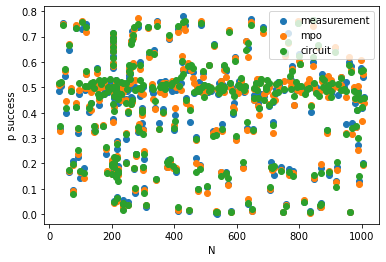

In [180]:
# Plot the data
plt.scatter(N,p_success_measurement,label="measurement")
plt.scatter(N,p_success_fourier_mpo,label="mpo")
plt.scatter(N,p_success_fourier_circuit,label="circuit")
plt.xlabel("N")
plt.ylabel("p success")
plt.legend()
plt.show()


In [181]:
#get maximum_entanglement_entropy
def get_max_entanglement_entropy(entanglement_entropy):
    return np.max(entanglement_entropy)

def get_max_bond_dimension(schmidt_values):
    l = [len(s) for s in schmidt_values]
    return np.max(l) 

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


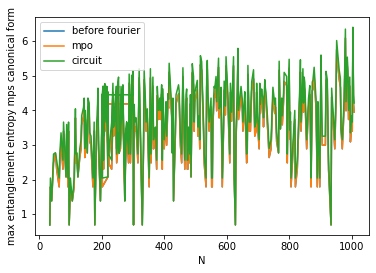

/usr/lib/python3/dist-packages/matplotlib/collections.py:200: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


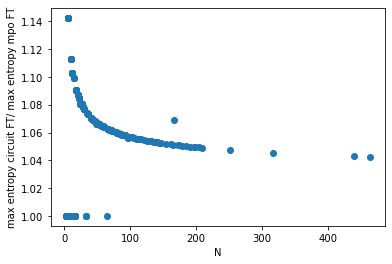

In [182]:
#Get the data
entanglement_entropy_before_fourier = np.array([get_max_entanglement_entropy(obj[i].entanglement_entropy_before_fourier) for i in range(len(obj))])
entanglement_entropy_fourier_mpo = np.array([get_max_entanglement_entropy(obj[i].entanglement_entropy_fourier_mpo) for i in range(len(obj))])
entanglement_entropy_fourier_circuit = np.array([get_max_entanglement_entropy(obj[i].entanglement_entropy_fourier_circuit) for i in range(len(obj))])
entanglement_entropy_before_fourier_meas = np.array([get_max_entanglement_entropy(obj[i].entanglement_entropy_before_fourier) for i in range(len(obj))])
entanglement_entropy_after_measurement = np.array([get_max_entanglement_entropy(obj[i].entanglement_entropy_measurement_before_fourier) for i in range(len(obj))])
entanglement_entropy_measurement_fourier = np.array([get_max_entanglement_entropy(obj[i].entanglement_entropy_measurement_after_fourier) for i in range(len(obj))])

#Plot the data
plt.plot(N,entanglement_entropy_before_fourier,label="before fourier")
plt.plot(N,entanglement_entropy_fourier_mpo,label="mpo")
plt.plot(N,entanglement_entropy_fourier_circuit,label="circuit")
plt.xlabel("N")
plt.ylabel("max entanglement entropy mps canonical form")
plt.legend()
#plt.savefig("max_entanglement_entropy.pdf")
plt.show()


plt.scatter(order,entanglement_entropy_fourier_circuit/entanglement_entropy_fourier_mpo)
plt.xlabel("N")
plt.ylabel("max entropy circuit FT/ max entropy mpo FT")
#plt.savefig("max_entanglement_entropy_circuit_divided_by_mpo.pdf")
plt.show()



316
316
316


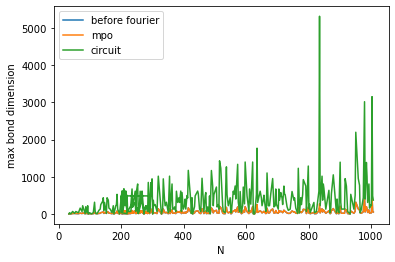

In [183]:
#Get the data
max_bond_dim_before_fourier = np.array([get_max_bond_dimension(obj[i].schmidt_values_before_fourier) for i in range(len(obj))])
max_bond_dim_fourier_mpo = np.array([get_max_bond_dimension(obj[i].schmidt_values_fourier_mpo) for i in range(len(obj))])
max_bond_dim_fourier_circuit = np.array([get_max_bond_dimension(obj[i].schmidt_values_fourier_circuit) for i in range(len(obj))])
max_bond_dim_before_fourier_meas = np.array([get_max_bond_dimension(obj[i].schmidt_values_before_fourier) for i in range(len(obj))])
max_bond_dim_measurement_before_fourier = np.array([get_max_bond_dimension(obj[i].schmidt_values_measurement_before_fourier) for i in range(len(obj))])
max_bond_dim_measurement_after_fourier = np.array([get_max_bond_dimension(obj[i].schmidt_values_measurement_after_fourier) for i in range(len(obj))])

print(len(max_bond_dim_before_fourier))
print(len(max_bond_dim_fourier_mpo))
print(len(max_bond_dim_fourier_circuit))


#Plot the data
plt.plot(N,max_bond_dim_before_fourier,label="before fourier")
plt.plot(N,max_bond_dim_fourier_mpo,label="mpo")
plt.plot(N,max_bond_dim_fourier_circuit,label="circuit")
plt.xlabel("N")
plt.ylabel("max bond dimension")
plt.legend()
#plt.savefig("max_bond_dimension.pdf")
plt.show()


In [184]:
#print N x and order
for i in range(len(N)):
    print("i:",i,"N: ",N[i],"x: ",x[i],"order: ",order[i])
    

i: 0 N:  33 x:  10 order:  2
i: 1 N:  35 x:  31 order:  6
i: 2 N:  39 x:  31 order:  4
i: 3 N:  45 x:  23 order:  12
i: 4 N:  51 x:  41 order:  16
i: 5 N:  55 x:  51 order:  10
i: 6 N:  63 x:  20 order:  6
i: 7 N:  65 x:  43 order:  12
i: 8 N:  69 x:  35 order:  22
i: 9 N:  75 x:  44 order:  10
i: 10 N:  77 x:  17 order:  30
i: 11 N:  85 x:  2 order:  8
i: 12 N:  87 x:  37 order:  28
i: 13 N:  91 x:  88 order:  6
i: 14 N:  93 x:  74 order:  30
i: 15 N:  95 x:  56 order:  2
i: 16 N:  99 x:  32 order:  6
i: 17 N:  105 x:  92 order:  4
i: 18 N:  111 x:  101 order:  6
i: 19 N:  115 x:  87 order:  44
i: 20 N:  117 x:  5 order:  12
i: 21 N:  119 x:  90 order:  16
i: 22 N:  123 x:  55 order:  8
i: 23 N:  129 x:  82 order:  14
i: 24 N:  133 x:  47 order:  18
i: 25 N:  135 x:  112 order:  36
i: 26 N:  141 x:  50 order:  46
i: 27 N:  143 x:  58 order:  60
i: 28 N:  145 x:  24 order:  14
i: 29 N:  147 x:  61 order:  42
i: 30 N:  153 x:  44 order:  16
i: 31 N:  155 x:  152 order:  60
i: 32 N:  159

In [185]:
figsizes = (9,5.625)

slope 1.0330685323038082 intercept 0.12079312341899717 r2 0.9982099645096042 p 0.0 se 0.0034929614218544305


/usr/lib/python3/dist-packages/matplotlib/collections.py:200: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


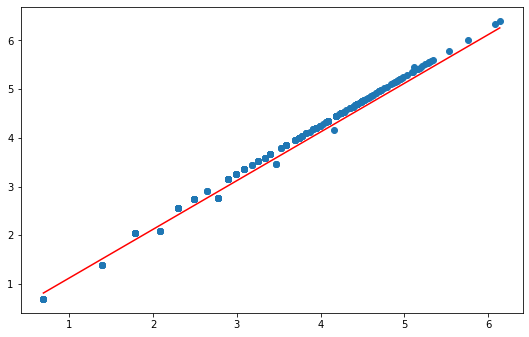

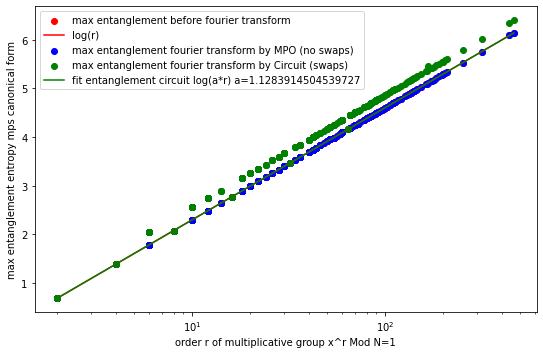

slope 7.496706787439274 intercept -15.183919291242717 r2 0.8790416422994376 p 4.904171611393577e-103 se 0.2294470059769638


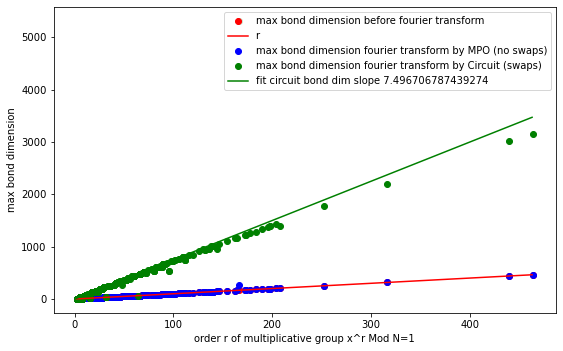

In [186]:
slope, intercept, r2, p, se = stats.linregress(np.log(order),entanglement_entropy_fourier_circuit)
print("slope",slope,"intercept",intercept,"r2",r2,"p",p,"se",se)
plt.figure(figsize=figsizes)
r = np.array([*range(min(order),max(order))])
plt.plot(np.log(r),np.log(r)+intercept,label="log(r)+intercept",color="red")
plt.scatter(np.log(order),entanglement_entropy_fourier_circuit)


plt.figure(figsize=figsizes)
plt.scatter(order,entanglement_entropy_before_fourier,label="max entanglement before fourier transform",color="red")
r = np.array([*range(min(order),max(order))])
plt.plot(r,np.log(r),label="log(r)",color="red")
plt.scatter(order,entanglement_entropy_fourier_mpo,label="max entanglement fourier transform by MPO (no swaps)",color="blue")

plt.scatter(order,entanglement_entropy_fourier_circuit,label="max entanglement fourier transform by Circuit (swaps)",color="green")
plt.plot(r,np.log(r),label="fit entanglement circuit log(a*r) a="+str(np.exp(intercept)),color="green")
plt.xlabel("order r of multiplicative group x^r Mod N=1")
plt.ylabel("max entanglement entropy mps canonical form")
plt.xscale('log')
plt.legend()
plt.savefig("pictures/max_entanglement_entropy_fourier.pdf")
plt.show()


slope, intercept, r2, p, se = stats.linregress(order,max_bond_dim_fourier_circuit)
print("slope",slope,"intercept",intercept,"r2",r2,"p",p,"se",se)

plt.figure(figsize=figsizes)
plt.scatter(order,max_bond_dim_before_fourier,label="max bond dimension before fourier transform",color="red")
plt.plot(r,r,label="r",color="red")
plt.scatter(order,max_bond_dim_fourier_mpo,label="max bond dimension fourier transform by MPO (no swaps)",color="blue")
plt.scatter(order,max_bond_dim_fourier_circuit,label="max bond dimension fourier transform by Circuit (swaps)",color="green")
plt.plot(r,np.array(r)*slope,label="fit circuit bond dim slope "+str(slope),color="green")
plt.xlabel("order r of multiplicative group x^r Mod N=1")
plt.ylabel("max bond dimension")
plt.legend()
plt.savefig("pictures/max_bond_dimension_fourier.pdf")
plt.show()

In [187]:
#get outliers
for i in range(len(N)):
    if max_bond_dim_fourier_circuit[i] > 4000:
        print("outlier",i,"N",N[i],"x",x[i],"order",order[i],"entanglement entropy",entanglement_entropy_fourier_mpo[i])

outlier 267 N 835 x 714 order 166 entanglement entropy (5.1082530803363175+0j)


N 253
x 127
len_a 19


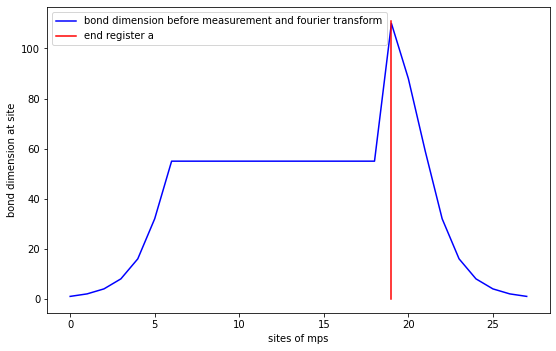

In [188]:
i = 102
print("N",N[i])
print("x",x[i])
plt.figure(figsize=figsizes)
schmidt_values_before_fourier = obj[i].schmidt_values_before_fourier
s = [len(schmidt_values_before_fourier[i]) for i in range(len(schmidt_values_before_fourier))]
plt.plot(s,label="bond dimension before measurement and fourier transform",color="blue")
len_a = 2*(int)(np.ceil(np.log2(N[i]))) + 3
print("len_a",len_a)
plt.plot([len_a,len_a],[0,s[len_a]+1],label = "end register a",color="red")
plt.xlabel("sites of mps")
plt.ylabel("bond dimension at site")
plt.legend()
plt.show()



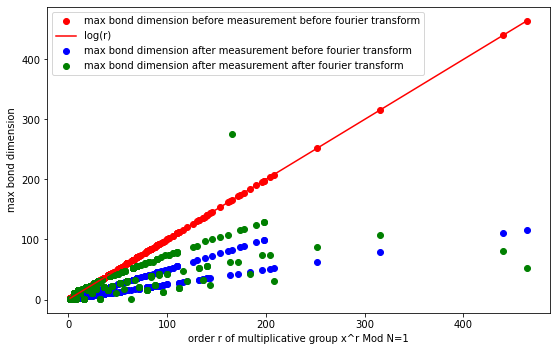

In [189]:
plt.figure(figsize=figsizes)
plt.scatter(order,max_bond_dim_before_fourier_meas,label="max bond dimension before measurement before fourier transform",color="red")
r = [*range(min(order),max(order))]
plt.plot(r,r,label="log(r)",color="red")
plt.scatter(order,max_bond_dim_measurement_before_fourier,label="max bond dimension after measurement before fourier transform",color="blue")
plt.scatter(order,max_bond_dim_measurement_after_fourier,label="max bond dimension after measurement after fourier transform",color="green")
plt.xlabel("order r of multiplicative group x^r Mod N=1")
plt.ylabel("max bond dimension")
plt.legend()
plt.savefig("pictures/max_bond_dimension_after_measurement.pdf")
plt.show()

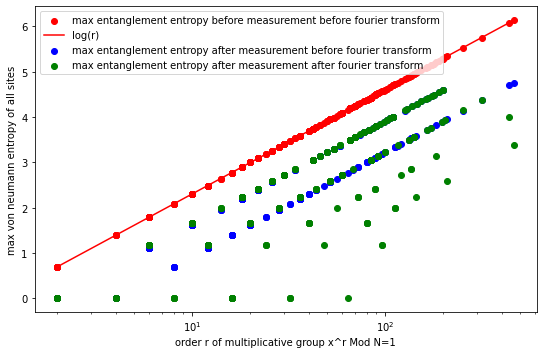

In [190]:
plt.figure(figsize=figsizes)
plt.scatter(order,entanglement_entropy_before_fourier_meas,label="max entanglement entropy before measurement before fourier transform",color="red")
r = [*range(min(order),max(order))]
plt.plot(r,np.log(r),label="log(r)",color="red")
plt.scatter(order,entanglement_entropy_after_measurement,label="max entanglement entropy after measurement before fourier transform",color="blue")
plt.scatter(order,entanglement_entropy_measurement_fourier,label="max entanglement entropy after measurement after fourier transform",color="green")
plt.xlabel("order r of multiplicative group x^r Mod N=1")
plt.ylabel("max von neumann entropy of all sites")
#plt.ylim(0,8)
plt.xscale('log')
plt.legend()
plt.savefig("pictures/max_entanglement_entropy_after_measurement_fourier.pdf")
plt.show()

In [191]:
for i in range(len(entanglement_entropy_after_measurement)):
    if entanglement_entropy_measurement_fourier[i] < 0.1:
        print("i",i,"N",N[i],"x",x[i],"order",order[i],"entanglement entropy after measurement after fourier transform",entanglement_entropy_measurement_fourier[i])

i 0 N 33 x 10 order 2 entanglement entropy after measurement after fourier transform -0.0
i 2 N 39 x 31 order 4 entanglement entropy after measurement after fourier transform -0.0
i 4 N 51 x 41 order 16 entanglement entropy after measurement after fourier transform -0.0
i 11 N 85 x 2 order 8 entanglement entropy after measurement after fourier transform -0.0
i 15 N 95 x 56 order 2 entanglement entropy after measurement after fourier transform -0.0
i 17 N 105 x 92 order 4 entanglement entropy after measurement after fourier transform -0.0
i 21 N 119 x 90 order 16 entanglement entropy after measurement after fourier transform -0.0
i 22 N 123 x 55 order 8 entanglement entropy after measurement after fourier transform -0.0
i 30 N 153 x 44 order 16 entanglement entropy after measurement after fourier transform -0.0
i 37 N 177 x 58 order 2 entanglement entropy after measurement after fourier transform -0.0
i 42 N 195 x 73 order 4 entanglement entropy after measurement after fourier transform

In [192]:
i = 64
print("N",N[i])
print("x",x[i])
print("p_success_measurement",p_success_measurement[i])
print(obj[i].schmidt_values)


N 273
x 34
p_success_measurement 0.734


AttributeError: 'analysing_entanglement_obj' object has no attribute 'schmidt_values'

N 77
x 17
order 30
success 0.198
len_a 17


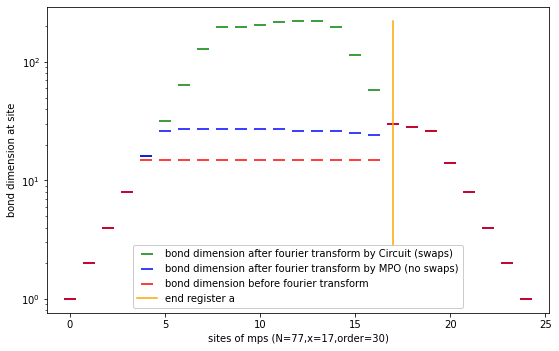

argmax_before_fourier 17 argmax_fourier_mpo 17 argmax_fourier_circuit 12


In [ ]:
i = 10
print("N",N[i])
print("x",x[i])
print("order",order[i])
print("success",p_success_fourier_circuit[i])
schmidt_values_before_fourier = obj[i].schmidt_values_before_fourier
s_before_fourier = [len(schmidt_values_before_fourier[i]) for i in range(len(schmidt_values_before_fourier))]
schmidt_values_fourier_mpo = obj[i].schmidt_values_fourier_mpo
s_fourier_mpo = [len(schmidt_values_fourier_mpo[i]) for i in range(len(schmidt_values_fourier_mpo))]
schmidt_values_fourier_circuit = obj[i].schmidt_values_fourier_circuit
s_fourier_circuit = [len(schmidt_values_fourier_circuit[i]) for i in range(len(schmidt_values_fourier_circuit))]

s=150

x_position = range(len(s_before_fourier))
plt.figure(figsize=figsizes)
plt.scatter(x_position,s_fourier_circuit,s=s,label="bond dimension after fourier transform by Circuit (swaps)",color="green",marker="_")
plt.scatter(x_position,s_fourier_mpo,s=s,label="bond dimension after fourier transform by MPO (no swaps)",color="blue",marker="_")
plt.scatter(x_position,s_before_fourier,s=s,label="bond dimension before fourier transform",color="red",marker="_")

len_a = 2*(int)(np.ceil(np.log2(N[i]))) + 3
print("len_a",len_a)
plt.plot([len_a,len_a],[1,np.max(s_fourier_circuit)],label = "end register a",color="orange")
plt.xlabel("sites of mps (N="+str(N[i])+",x="+str(x[i])+",order="+str(order[i])+")")
plt.ylabel("bond dimension at site")
plt.yscale('log')
plt.savefig
plt.legend(loc="lower center",framealpha=1)
plt.savefig("pictures/bond_dimension_at_all_sites_N="+str(N[i])+",x="+str(x[i])+",order="+str(order[i])+".pdf")
plt.show()

argmax_before_fourier = np.argmax(s_before_fourier)
argmax_fourier_mpo = np.argmax(s_fourier_mpo)
argmax_fourier_circuit = np.argmax(s_fourier_circuit)
print("argmax_before_fourier",argmax_before_fourier,"argmax_fourier_mpo",argmax_fourier_mpo,"argmax_fourier_circuit",argmax_fourier_circuit)







1.0000000000000002
1.0
1.0000000000000004
[3.33333712e-02 3.33333712e-02 3.33159560e-02 3.33159560e-02
 3.33149342e-02 3.33149342e-02 3.31864311e-02 3.31864311e-02
 3.31825194e-02 3.31825194e-02 3.31051247e-02 3.31051247e-02
 3.29898767e-02 3.29898767e-02 3.29828589e-02 3.29828589e-02
 3.29736989e-02 3.29736989e-02 3.28755794e-02 3.28755794e-02
 3.28220533e-02 3.28220533e-02 3.27829272e-02 3.27829272e-02
 3.27754786e-02 3.27754786e-02 3.27708276e-02 3.27708276e-02
 3.27014449e-02 3.27014449e-02 5.89193452e-04 5.89193452e-04
 5.25023034e-04 5.25023034e-04 5.22266512e-04 5.22266512e-04
 5.12883650e-04 5.12883650e-04 4.77117202e-04 4.77117202e-04
 4.27677081e-04 4.27677081e-04 3.35573916e-04 3.35573916e-04
 3.34108724e-04 3.34108724e-04 3.20854794e-04 3.20854794e-04
 2.15272736e-04 2.15272736e-04 1.40798225e-04 1.40798225e-04
 1.37393517e-04 1.37393517e-04 4.19805388e-05 4.19805388e-05
 3.73661591e-05 3.73661591e-05 3.64109268e-05 3.64109268e-05
 3.48498576e-05 3.48498576e-05 3.34029643e-

1

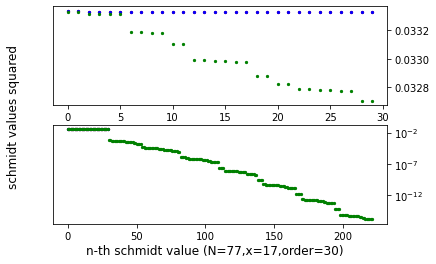

<Figure size 648x405 with 0 Axes>

In [ ]:
fig, (ax1, ax2) = plt.subplots(2)
plt.figure(figsize=figsizes)
s=5
x_position = range(len(schmidt_values_before_fourier[argmax_before_fourier]))
ax2.scatter(x_position,np.power(schmidt_values_before_fourier[argmax_before_fourier],2),s=s,label="schmidt values before fourier transform at site: "+str(argmax_before_fourier),color="red")
ax2.scatter(x_position,np.power(schmidt_values_fourier_mpo[argmax_fourier_mpo],2),s=s,label="schmidt values after fourier transform by MPO (no swaps) at site: "+str(argmax_fourier_mpo),color="blue")
x_position = range(len(schmidt_values_fourier_circuit[argmax_fourier_circuit]))
ax2.scatter(x_position,np.power(schmidt_values_fourier_circuit[argmax_fourier_circuit],2),s=s,label="schmidt values after fourier transform by Circuit (swaps) at site: "+str(argmax_fourier_circuit),color="green")
ax2.set_yscale('log')
ax2.tick_params(labelright=True,labelleft=False,right=True,left=False)

x_position = range(len(schmidt_values_before_fourier[argmax_before_fourier]))
ax1.scatter(x_position,np.power(schmidt_values_before_fourier[argmax_before_fourier],2),s=s,label="schmidt values before fourier transform at site: "+str(argmax_before_fourier),color="red")
ax1.scatter(x_position,np.power(schmidt_values_fourier_mpo[argmax_fourier_mpo],2),s=s,label="schmidt values after fourier transform by MPO (no swaps) at site: "+str(argmax_fourier_mpo),color="blue")

ax1.scatter(x_position,np.power(schmidt_values_fourier_circuit[argmax_fourier_circuit][:len(schmidt_values_before_fourier[argmax_before_fourier])],2),s=s,label="schmidt values after fourier transform by Circuit (swaps) at site: "+str(argmax_fourier_circuit),color="green")
#ax1.set_yscale('log')
ax1.tick_params(labelright=True,labelleft=False,right=True,left=False)




fig.supxlabel("n-th schmidt value (N="+str(N[i])+",x="+str(x[i])+",order="+str(order[i])+")")
fig.supylabel("schmidt values squared")
fig.savefig("pictures/schmidt_values_at_max_site_N_"+str(N[i])+"_x_"+str(x[i])+"_order_"+str(order[i])+".pdf")
fig.show()

print(np.sum(np.power(schmidt_values_before_fourier[argmax_before_fourier],2)))
print(np.sum(np.power(schmidt_values_fourier_mpo[argmax_fourier_mpo],2)))
print(np.sum(np.power(schmidt_values_fourier_circuit[argmax_fourier_circuit],2)))
print(np.power(schmidt_values_fourier_circuit[argmax_fourier_circuit],2))
len(schmidt_values_fourier_circuit[argmax_fourier_circuit][s>10^(-8)])


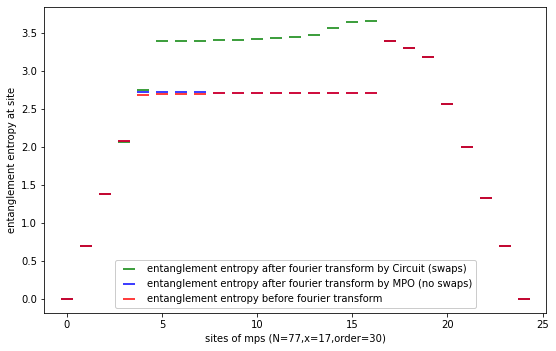

argmax_before_fourier 17 argmax_fourier_mpo 17 argmax_fourier_circuit 12


In [ ]:

entanglement_entropy_before_fourier = obj[i].entanglement_entropy_before_fourier
entanglement_entropy_fourier_mpo = obj[i].entanglement_entropy_fourier_mpo
entanglement_entropy_fourier_mpo[0] = 0
entanglement_entropy_fourier_circuit = obj[i].entanglement_entropy_fourier_circuit

x_position = range(len(entanglement_entropy_before_fourier))

s= 150

plt.figure(figsize=figsizes)
plt.scatter(x_position,entanglement_entropy_fourier_circuit,s=s,label="entanglement entropy after fourier transform by Circuit (swaps)",color="green",marker="_")
plt.scatter(x_position,entanglement_entropy_fourier_mpo,s=s,label="entanglement entropy after fourier transform by MPO (no swaps)",color="blue",marker="_")
plt.scatter(x_position,entanglement_entropy_before_fourier,s=s,label="entanglement entropy before fourier transform",color="red",marker="_")
plt.xlabel("sites of mps (N="+str(N[i])+",x="+str(x[i])+",order="+str(order[i])+")")
plt.ylabel("entanglement entropy at site")
plt.legend(loc="lower center",framealpha=1)
plt.savefig("pictures/entanglement_entropy_all_sites_N="+str(N[i])+",x="+str(x[i])+",order="+str(order[i])+".pdf")
plt.show()

argmax_ent_before_fourier = np.argmax(entanglement_entropy_before_fourier)
argmax_ent_fourier_mpo = np.argmax(entanglement_entropy_fourier_mpo)
argmax_ent_fourier_circuit = np.argmax(entanglement_entropy_fourier_circuit)
print("argmax_before_fourier",argmax_before_fourier,"argmax_fourier_mpo",argmax_fourier_mpo,"argmax_fourier_circuit",argmax_fourier_circuit)


In [ ]:
#Entanglement after measurment
